In [3]:
from pathlib import Path

from tqdm import tqdm

import cv2
from decord import VideoReader, cpu

p_src_mp4s_dir = Path('/data/datasets/ego4d_data/v2/tmp-clips_320p-non_official/')
p_tgt_mp4s_dir = Path('/data/datasets/ego4d_data/v2/clips_320p-non_official/')
p_src_mp4s = list(p_src_mp4s_dir.glob('*.mp4'))
for p_mp4 in tqdm(p_src_mp4s):
    vr = VideoReader(str(p_mp4), ctx=cpu(0))
    h, w, _ = vr[0].shape

    p_out = p_tgt_mp4s_dir / p_mp4.name
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # or 'XVID', 'MJPG', 'X264', etc.
    out = cv2.VideoWriter(str(p_out), fourcc, vr.get_avg_fps(), (w, h))

    for i in range(len(vr)):
        frame = vr[i].asnumpy()
        out.write(frame)

    out.release()

In [4]:
p_out

PosixPath('/data/datasets/ego4d_data/v2/clips_320p-non_official/8120ab32-5cea-42cb-9986-9d35f8b0feaa.mp4')

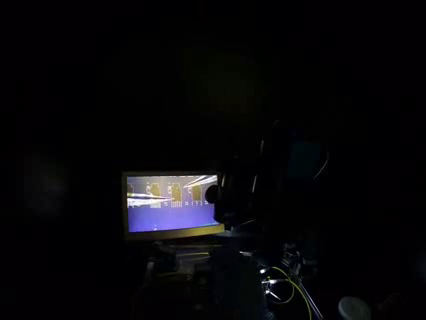

In [10]:
from PIL import Image

vvr = VideoReader(('output_video.mp4'), ctx=cpu(0))
Image.fromarray(vvr[2000].asnumpy())